Hosts inicializados
Canais inicializados
Pares EPRs adicionados


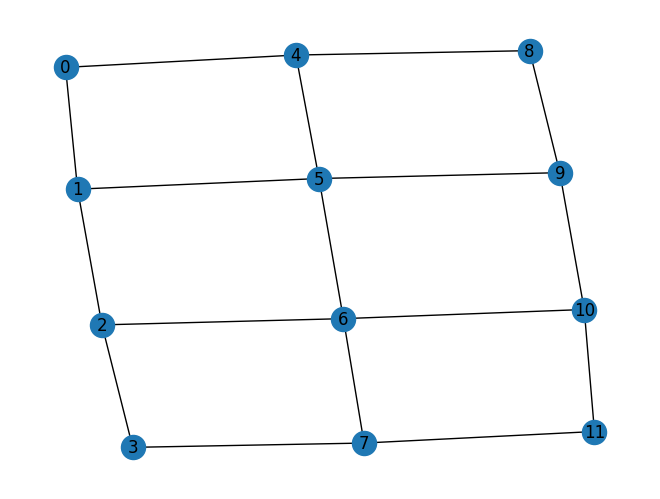

In [1]:
from quantumnet.components import Controller, Network
from quantumnet.control.table import ProactiveTable
from quantumnet.control.rule import BasicRuleProactive
rede = Network()
controlador = Controller(rede)
row, col = 3, 4
rede.set_ready_topology("Grade", row, col)
rede.draw()

In [2]:
proactive = ProactiveTable()
controlador.set_conditions_table(proactive)

def add_match_route_rule_in_host_proactive(controller, alice, bob, fmin, neprs):
    host = controlador.network.get_host(alice)
    route = controlador.calculate_route(alice, bob)
    # Cria a regra
    rule = BasicRuleProactive
    # Qualifica as ações de acordo com as informações da request.
    rule = controlador.qualify_rule(rule, route)
    # Adiciona a rota e as ações ao host.
    host.add_match_route_rule(bob, fmin, neprs, route, rule)
    

In [3]:
hosts = rede.hosts
print(hosts)
for host in hosts:
    print("Preenchendo a tabela do Host", host)
    conexoes = rede.graph[host]
    for vizinho in conexoes:
        add_match_route_rule_in_host_proactive(controlador, host, vizinho, 1,   1)
        add_match_route_rule_in_host_proactive(controlador, host, vizinho, 0.5, 1)
    rede.get_host(host).draw_flow_table()

{0: <quantumnet.components.host.Host object at 0x000001D80071CF20>, 1: <quantumnet.components.host.Host object at 0x000001D87EA658E0>, 2: <quantumnet.components.host.Host object at 0x000001D87FF090D0>, 3: <quantumnet.components.host.Host object at 0x000001D87FEF69C0>, 4: <quantumnet.components.host.Host object at 0x000001D87FEF5BB0>, 5: <quantumnet.components.host.Host object at 0x000001D80083B4D0>, 6: <quantumnet.components.host.Host object at 0x000001D80086E690>, 7: <quantumnet.components.host.Host object at 0x000001D80086DE50>, 8: <quantumnet.components.host.Host object at 0x000001D800442A20>, 9: <quantumnet.components.host.Host object at 0x000001D8006471D0>, 10: <quantumnet.components.host.Host object at 0x000001D80081A690>, 11: <quantumnet.components.host.Host object at 0x000001D800818FB0>}
Preenchendo a tabela do Host 0
+-------------+---------+--------------------+
| Match       | Route   | Rule               |
+=============+=========+====================+
| (4, 1, 1)   | [0, 4